In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #for stats model
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
fb_data = pd.read_excel('Facebook Audience.xlsx')

# Convert appropriate columns to numeric
fb_data['Amount spent (GBP)'] = fb_data['Amount spent (GBP)'].replace('GBP', np.nan)
fb_data['Amount spent (GBP)'] = pd.to_numeric(fb_data['Amount spent (GBP)'], errors='coerce')
fb_data['Reach'] = pd.to_numeric(fb_data['Reach'], errors='coerce')
fb_data['Impressions'] = pd.to_numeric(fb_data['Impressions'], errors='coerce')
fb_data['Frequency'] = pd.to_numeric(fb_data['Frequency'], errors='coerce')
fb_data['Link clicks'] = pd.to_numeric(fb_data['Link clicks'], errors='coerce')
fb_data['CPC (all)'] = pd.to_numeric(fb_data['CPC (all)'], errors='coerce')

# Handle missing values
fb_data.fillna(fb_data.mean(), inplace=True)


# Convert categorical variables into numerical ones
label_encoder = LabelEncoder()
fb_data['Gender'] = label_encoder.fit_transform(fb_data['Gender'])
fb_data['Location'] = label_encoder.fit_transform(fb_data['Location'])
fb_data['Age'] = label_encoder.fit_transform(fb_data['Age'])

C:\Users\Asad\AppData\Local\Temp\ipykernel_10720\3699870947.py:27: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  fb_data.fillna(fb_data.mean(), inplace=True)
C:\Users\Asad\AppData\Local\Temp\ipykernel_10720\3699870947.py:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  fb_data.fillna(fb_data.mean(), inplace=True)


## Ad Spending

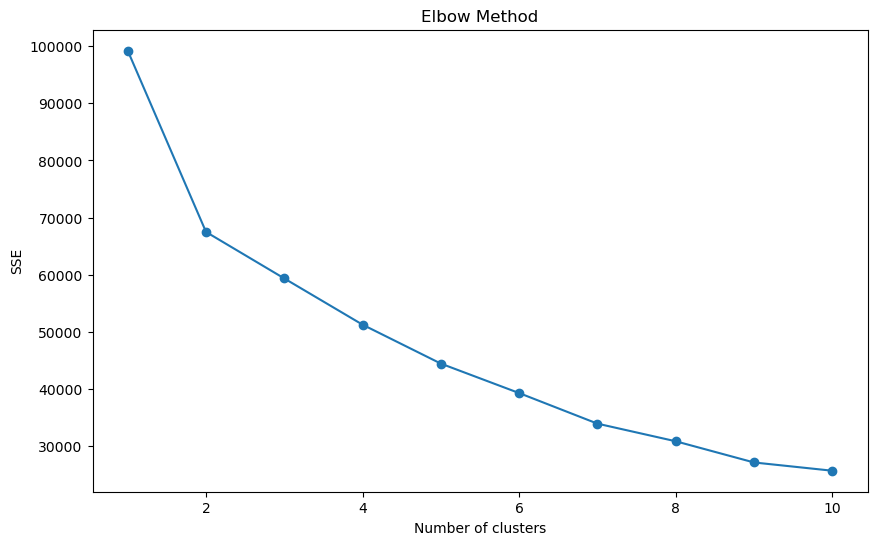

In [2]:
# Standardize the data
scaler = StandardScaler()
numerical_features = ['Gender', 'Age', 'Reach', 'Impressions', 'Frequency', 'Amount spent (GBP)', 'Link clicks', 'CPC (all)']
fb_data[numerical_features] = scaler.fit_transform(fb_data[numerical_features])

# Customer Segmentation using K-means
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fb_data[numerical_features])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
fb_data['Cluster'] = kmeans.fit_predict(fb_data[numerical_features])

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target variable for amount spent prediction
features = fb_data[['Age', 'Gender', 'Reach', 'Impressions', 'Frequency', 'Link clicks', 'CPC (all)']]
target = fb_data['Amount spent (GBP)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train and evaluate RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor - Mean Squared Error: {mse}")
print(f"Random Forest Regressor - R-squared: {r2}")

Random Forest Regressor - Mean Squared Error: 0.04758699930300979
Random Forest Regressor - R-squared: 0.9524637502552226


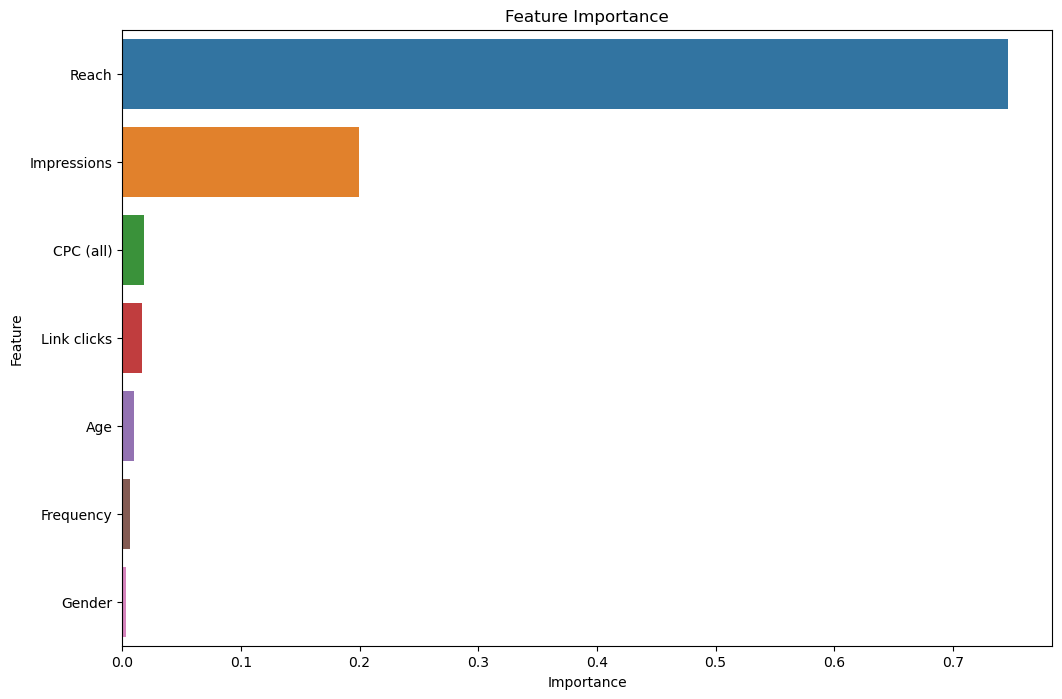

In [10]:
# Feature importance for RandomForest
importances = model.feature_importances_
feature_names = features.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


## Amount Spent

In [13]:
# Assuming fb_data is your DataFrame
fb_data.rename(columns={'Amount spent (GBP)': 'Amount_spent_GBP', 'CPC (all)': 'CPC_all', "Link clicks": 'Link_clicks'}, inplace=True)

In [14]:
model = sm.OLS.from_formula('Amount_spent_GBP ~ Age + Gender + Reach + Impressions + Frequency + Link_clicks + CPC_all', data=fb_data).fit() # Creating linear regression model
model.summary() #generating model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Amount_spent_GBP   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.078e+04
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:13:59   Log-Likelihood:                -1818.5
No. Observations:               12400   AIC:                             3653.
Df Residuals:                   12392   BIC:                             3712.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.041e-17      0.003  -4.14e-15      1.000      -0.005       0.005
Age             0.0290      0.003     11.291      0.000       0.024       0.034
Gender         -0.0329      0.003    -12.814      0.000      -0.038      -0.028
Reach           0.5847      0.051     11.483      0.000       0.485       0.685
Impressions     0.2989      0.050      5.943      0.000       0.200       0.397
Frequency      -0.0037      0.003     -1.464      0.143      -0.009       0.001
Link_clicks     0.0955      0.004     23.082      0.000       0.087       0.104
CPC_all         0.0679      0.003     26.254      0.000       0.063       0.073
==============================================================================
Omnibus:                     5070.706   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118659.789
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      17.885   Cond. No.                         46.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model = sm.OLS.from_formula('Amount_spent_GBP ~ Age + Gender + Reach + Impressions + Link_clicks + CPC_all', data=fb_data).fit() # Creating linear regression model
model.summary() #generating model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Amount_spent_GBP   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 2.424e+04
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:14:00   Log-Likelihood:                -1819.6
No. Observations:               12400   AIC:                             3653.
Df Residuals:                   12393   BIC:                             3705.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.041e-17      0.003  -4.14e-15      1.000      -0.005       0.005
Age             0.0290      0.003     11.302      0.000       0.024       0.034
Gender         -0.0330      0.003    -12.862      0.000      -0.038      -0.028
Reach           0.5973      0.050     11.898      0.000       0.499       0.696
Impressions     0.2865      0.050      5.779      0.000       0.189       0.384
Link_clicks     0.0954      0.004     23.059      0.000       0.087       0.103
CPC_all         0.0679      0.003     26.274      0.000       0.063       0.073
==============================================================================
Omnibus:                     5070.068   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118695.052
Skew:                           1.423   Prob(JB):                         0.00
Kurtosis:                      17.887   Cond. No.                         46.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""